In [15]:
import string

In [16]:
#Reading text
text=open("read.txt",encoding="utf-8").read()

## TEXT PREPROCESSING

In [36]:
#Lower case text
lower_text=text.lower()
# print(lower_text)

In [37]:
#Remove punctuations
clean_text=lower_text.translate(str.maketrans('', '', string.punctuation))
# print(clean_text)

In [40]:
#Tokenizing word
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokenized_words=word_tokenize(clean_text,"english")
# print(tokenized_words)

In [41]:
#Removing stopwords
from nltk.corpus import stopwords
final_words=[word for word in tokenized_words if word not in stopwords.words("english")]
# print(final_words)

In [54]:
#Lemmatization : From plural to singular form + Base form of verb (eg. better -> good)
from nltk.stem import WordNetLemmatizer
lemma_words=[]
for word in final_words:
    word=WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

## NLP EMOTION

In [55]:
emotion_list={}
with open('emotion.txt','r') as file:
    for line in file:
        clean_line=line.replace("\n","").replace("'","").replace(",","").strip()
        word,emotion=clean_line.split(":")
        
        if word in lemma_words:
            if emotion not in emotion_list:
                emotion_list[emotion]=1
            else:
                emotion_list[emotion]+=1
print(emotion_list)
total=sum(emotion_list.values())
for key in emotion_list.keys():
    emotion_list[key]=round((emotion_list[key]*100)/total,2)
print(emotion_list)

{' attached': 1, ' hated': 3, ' sad': 4, ' happy': 5, ' free': 1, ' alone': 3, ' attracted': 1, ' anxious': 1, ' fearful': 1, ' focused': 1, ' adequate': 1}
{' attached': 4.55, ' hated': 13.64, ' sad': 18.18, ' happy': 22.73, ' free': 4.55, ' alone': 13.64, ' attracted': 4.55, ' anxious': 4.55, ' fearful': 4.55, ' focused': 4.55, ' adequate': 4.55}


In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentimentAnalyze(text):
    sentiment=SentimentIntensityAnalyzer().polarity_scores(text)
    if sentiment['neg']>sentiment['pos'] :
        print("Negative")
    elif sentiment['neg']<sentiment['pos']:
        print("Positive")
    else:
        print("Neutral")
sentimentAnalyze(clean_text)

Positive


## VISUALIZATION

In [57]:
import matplotlib.pyplot as plt

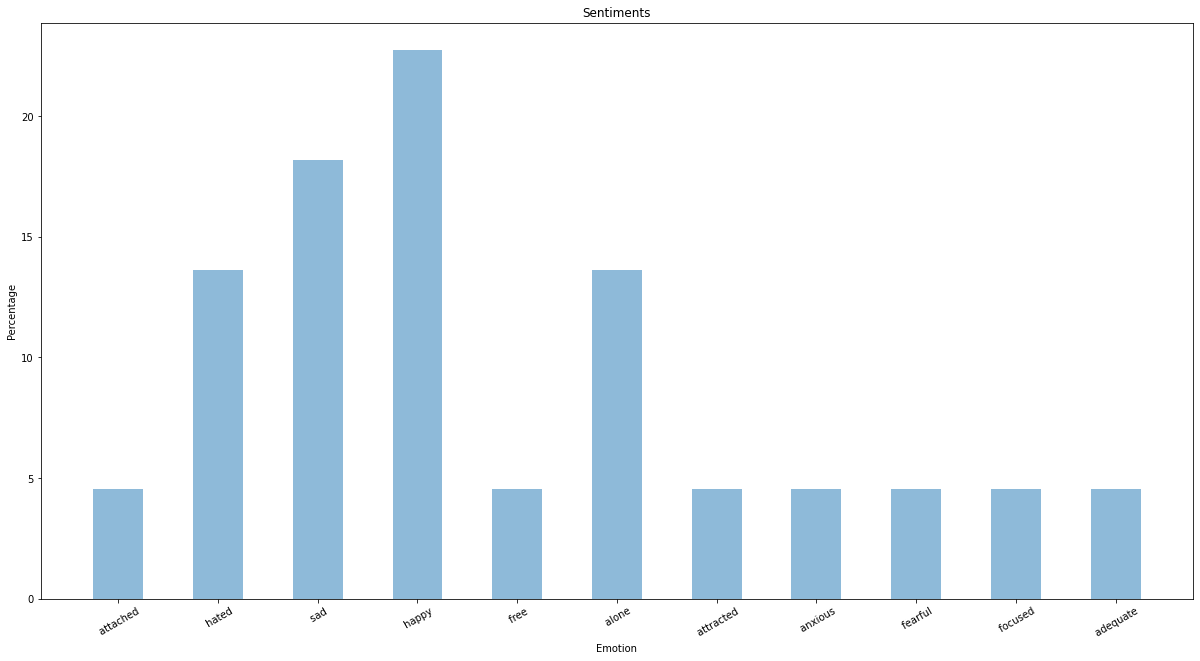

In [58]:
fig=plt.figure(figsize=(16,8))
axes=fig.add_axes([0,0,1,1])
axes.bar(emotion_list.keys(),emotion_list.values(),align='center',width=0.5,alpha=0.5)
axes.set_title('Sentiments')
axes.set_xlabel('Emotion')
axes.set_ylabel('Percentage')
plt.xticks(rotation=30)
plt.show()

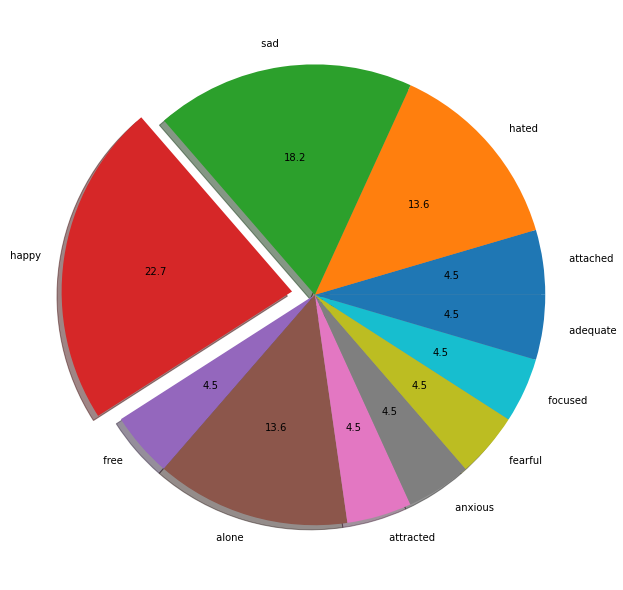

In [77]:
fig=plt.figure(figsize=(16,8))
axes=fig.add_axes([0,0,1,1])
explode=[val//max(emotion_list.values()) for val in emotion_list.values()]
explode=[val/10 for val in explode]
axes.pie(emotion_list.values(),labels=emotion_list.keys(),autopct='%.1f',explode=explode,shadow=True,)
plt.show()